# Homework 7

Unlike previous homework assignments, this homework is **completed as a group** and **submitted on CCLE.** In other words, it's similar to an extended Discussion Activity. 

> We affirm that we personally wrote the text, code, and comments in this homework assignment. 

> We received help from \[live lecture notes\]  who gave me suggestions on \[plotting the graphs and checking to see for mistakes\].

\- \[Lauren, Rashi, David\] May 26, 2021

## Problem 0

It is highly recommended that you work with your group to fully complete the previous Discussion assignments related to the project this week, as all of these are directly helpful for your project submission. 

## Problem 1

In your project, you are required to demonstrate the use of decision trees and multinomial logistic regression classifiers. Groups of three must also demonstrate the use of one additional model. In this homework assignment, you will write a detailed report that will largely fulfill this requirement. 

Choose one machine learning model, other than decision trees and multinomial logistic regression (unless you are a group of 2 -- see below). Some possibilities include, but are not limited to: 

- Support vector classifiers (`sklearn.svm.SVC`). Complexity parameter is called `gamma`. Higher values create more complex models)
- K-nearest-neighbor classifiers (`sklearn.neighbors.KNeighborsClassifier`). Complexity parameter is called `n_neighbors`. Higher values create less complex models. When working with KNN models, it is helpful to standardize your data columns first. For this purpose, `sklearn.preprocessing.StandardScaler` can be used. 
- Multilayer perceptron classifier, a kind of neural network (`sklearn.neural_network.MLPClassifier`). The complexity is controlled by the number of neurons and layers, as specified by the `hidden_layer_sizes` parameter -- more neurons and layers correspond to more complex models. 

You should consult the documentation for these models, which is available online or via `?`. 


#### Groups of 2

If you are a group of 2, you are not required to use an additional model and may instead use multinomial logistic regression for this assignment. Please note this in your submission. 

- Multinomial logistic regression (`sklearn.linear_model.LogisticRegression`). The complexity is controlled by `C`, the inverse regularization strength. Larger values of `C` correspond to more complex models. 

### Instructions

Replicate and expand the pipeline from Discussion 15, substituting out decision trees for your chosen classifier. In particular, you should: 

1. **Load** the data. 
2. **Split the data** into training and test sets. 
3. Write one or more functions to **clean and transform the data** as needed. You should add comments and function docstrings as appropriate to describe to your reader what you are doing and why. Apply your functions to the training and test sets. 
4. **Select 3 columns (features)** from the data. You are required to use at least one qualitative feature (like Island or Sex). We saw one way of doing this "by hand" during a previous Live Lecture, but there are many other approaches as well. You may wish to delegate one group member to do some research on the topic of "feature selection in Python with sklearn". 
4. **Use cross-validation** to estimate optimal model complexity (*Note*: cross-validation is also an acceptable way to perform feature selection -- you may use it above, but you are required to use it here). 
5. Having selected your features and an optimal complexity, **evaluate your model on the test set.** 
6. **Inspect** a few instances in which your trained model gave the wrong answer on the test set. Explain why your model was "tricked" in this case? Create and comment on a confusion matrix -- [check Monday's lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/digits.ipynb) for an example. 
7. **Plot the decision regions** for your model. These are covered in a recent live lecture, and code required to construct them is below. The horizontal and vertical axes should be the two quantitative predictor variables that you selected. Create a separate plot for each possible value of the qualitative predictor variable that you selected. For example, if you chose `Sex` as your qualitative variable, you should show two plots, with the decision regions for Female and Male penguins separately. Add appropriate axis labels and any other measures required to make your plots look professional. Add commentary to contextualize the mistakes that your model made. 
    - You are welcome to use the [code from live lecture](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) for this purpose. A common pitfall when using code for manual decision regions is re-training a model (using `model.fit()`) once for each plot. You should ensure that your model is only trained once, and that its predictions are then extracted for each plot. 

Throughout, add helpful explanation for your reader. For example, you should explain the idea behind cross-validation; anything you are able to learn about how your model works; how to interpret the optimal complexity parameter; and why your model went wrong in certain cases.  

### Additional Specifications

This homework will be graded by me personally, and will be graded using a rubric very similar to that used for the final project. I'll also give you some feedback indicating how you can improve. To get the most benefit out of this feedback, you should **treat this homework as a rehearsal for the full project.** 

Your solution should **not** fit in a single code cell -- a good, readable, and adequately-explained solution will likely require at least one code cell for each of the eight steps above. Make sure that there is plenty of surrounding text explanation and comments. Add code cells and plenty of markdown cells as needed. You can also use section headers with `###` to organize your work. 

Your comments and explanation should be written to an imaginary reader who has never encountered the Palmer Penguins data set before, and knows less about machine learning than you do. Explain your steps. Why train-test split? Why cross-validation? Why decision regions? And so on. If you'd like, imagine that you are writing to a time-traveller version of you from two weeks ago. 

It is not necessary to submit the HW on a copy of this notebook -- you may create and submit a fresh notebook if you wold like. Regardless, 

#### You are required to include a Group Contributions Statement on this HW. 

## Your Solution

In [1]:
# Imports
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

In [2]:
# Load the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [3]:
#drop penguin with sex as period
penguins = penguins.drop(penguins.index[336])

In [4]:
# Split the data into test/train sets
from sklearn.model_selection import train_test_split

penguins = penguins[['Species', 'Culmen Length (mm)', 
                     'Culmen Depth (mm)', 'Flipper Length (mm)', 
                     'Body Mass (g)', 'Sex']]
penguins = penguins.dropna()
# make sure that the random values that your code will generate 
# will be the same every time you run the code.
np.random.seed(3354354524)

# Since Species is the target variable...
X = penguins.drop(['Species'], axis = 1)
y = penguins['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
# Clean and transform the data

def clean_penguin_data(x_train, x_test, Y_train, Y_test):
    '''
    clean_penguin_data takes in the four train/test sets as parameters
    and cleans the data for each and then returns the cleaned copies back
    '''
    xtr = x_train.copy()
    xt = x_test.copy()
    le = preprocessing.LabelEncoder()
    xtr['Sex'] = le.fit_transform(x_train['Sex'])
    Y_train = le.fit_transform(Y_train)
    xt['Sex'] = le.fit_transform(x_test['Sex'])
    Y_test = le.fit_transform(Y_test)
    
    return (xtr, xt, Y_train, Y_test)

X_train, X_test, y_train, y_test = clean_penguin_data(X_train, X_test, y_train, y_test)

In [6]:
# Select 3 columns (features)

from sklearn.feature_selection import f_classif
threshold = 5 # the number of most relevant features
high_score_features = []
feature_scores = f_classif(X_train, y_train)[0]
for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
      print(f_name, score)
      high_score_features.append(f_name)

Flipper Length (mm) 457.9338633778228
Culmen Length (mm) 314.000282132296
Body Mass (g) 289.5602925739326
Culmen Depth (mm) 281.48061139126463
Sex 0.0018421586083179375


### Selected Columns
We can see that the Flipper Length, Culmen Depth, and Culmen Length are the most relevant features.
Since it is required to have a qualitative column as well, we will choose the top two columns and one qualitative feature.

So, the 3 columns that we choose are **Flipper Length, Culmen Depth, and Sex**.

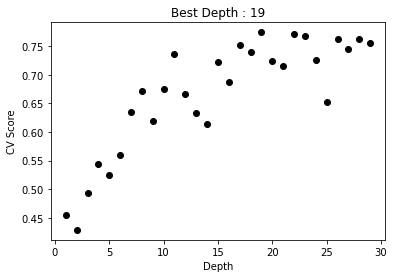

In [7]:
# Use cross-validation

# First, drop the columns that aren't being used anymore
X = penguins.drop(['Species', 'Culmen Length (mm)', 'Body Mass (g)'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test, y_train, y_test = clean_penguin_data(X_train, X_test, y_train, y_test)

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

fig, ax = plt.subplots(1)
best_score = 0

# For 30 depths, find the highest score to find the best depth
for d in range(1,30):
    clf = MLPClassifier(hidden_layer_sizes=(d, d, d), max_iter=3000)
    cv_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score
        
l = ax.set(title = "Best Depth : " + str(best_depth),
xlabel = "Depth",
ylabel = "CV Score")

In [8]:
# Train an MLPClassifier at best complexity, and evaluate the model on the test set

clf = MLPClassifier(hidden_layer_sizes=(17, 17, 17), max_iter=3000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7313432835820896

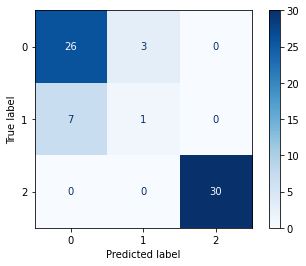

In [9]:
# Create and comment on a confusion matrix 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
c = confusion_matrix(y_train, y_train_pred)

disp = plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)

In [10]:
#array for confusin matrix
c

array([[108,   9,   0],
       [ 53,   7,   0],
       [  0,   0,  89]])

In [15]:
mistakes = X_train[y_train != y_train_pred]
mistake_labels = y_train[y_train != y_train_pred]
mistake_preds = y_train_pred[y_train != y_train_pred]

mistake_preds, mistake_labels
#pred is the what the model gave / predicted
#label is the actual value

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

Note: For species <br>
0 = adelie  <br>
1 = chinstrap<br>
2 = gentoo

### Discussion of Mistakes
As we were training our model, we used Flipper Length, Culmen Depth, and Sex. The model wrong and had managed to classify all the chinstrap penguins as adelie penguins. The model probably was tricked because the adelie and chinstrap penguins are similar sizes. Although generally the chinstrap is typically slightly larger than the adelie penguins, the difference was not apparent enough for our model to take notice. The model was only able to notice the difference between the adelie and chinstrap as 1 group and the gentoo as its own group. While the model failed to see the difference between the adelie and chinstrap, the gentoo penguins size was noticably larger and the model could recognize them as their own. It is possible that the categories we chose were not optimal which allowed our model to get tricked.Because of the similarity in size, the model was tricked. Maybe for our finalized version, we could replace one of our current categories with a category with more variance so the data will be able to pick out differences. 


array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]])

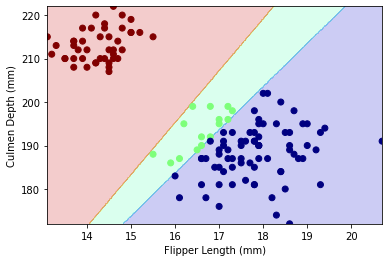

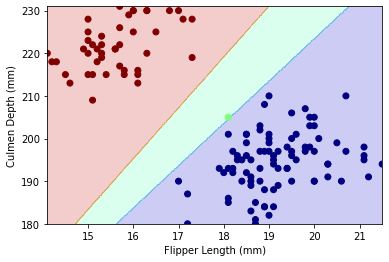

In [14]:
# Plot the decision regions
from sklearn import tree
def plot_regions(c, X, y):
    '''
    function used to plot regions 
    borrowed from the live lecture's code
    '''
        
    # for convenience, give names to the two 
    # columns of the data
    x1 = X['Flipper Length (mm)']
    x0 = X['Culmen Depth (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
    XX = xx.ravel()
    YY = yy.ravel()
    
    XY = np.c_[XX, YY]

    p = c.predict(XY)
    p = p.reshape(xx.shape)
    
    # create the plot
    fig, ax = plt.subplots(1)
    
    # use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
    
    # plot the data
    ax.scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)
    
    ax.set(xlabel = "Flipper Length (mm)", 
           ylabel = "Culmen Depth (mm)")
    
    return p


# Fit the model with dropped Sex column, so that it can have 2 columns for plot regions
clf.fit(X_train.drop(['Sex'], axis=1), y_train)

# Separate the males and females, drop the sex column, predict the y's and plot
X_male = X_train.loc[X_train['Sex'] == 0]
X_male = X_male.drop(['Sex'], axis=1)
y_male = clf.predict(X_male)

X_female = X_train.loc[X_train['Sex'] == 1]
X_female = X_female.drop(['Sex'], axis=1)
y_female = clf.predict(X_female)

thing = plot_regions(clf, X_male, y_male)
plot_regions(clf, X_female, y_female)

Group Contribution Statement:

Lauren did the actual coding for loading in the data prepping it. 
Rashi and Lauren both worked on deciding which columns would be used and cross validating the data.
Lauren created the confusion matrix.
David intrepreted the confusion matrix and wrote the explaination.
Lauren and David worked on plotting the regions.



In [13]:
X_train

,Culmen Depth (mm),Flipper Length (mm),Sex
141,17.2,187.0,1
328,14.0,208.0,0
178,18.4,200.0,0
23,18.1,185.0,1
202,16.4,199.0,0
...,...,...,...
105,18.9,184.0,1
247,15.0,215.0,1
272,14.4,210.0,0
107,20.0,190.0,1
